<a href="https://colab.research.google.com/github/RamyaGuru/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/AtomVisionExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example to run [AtomVision](https://github.com/usnistgov/atomvision)

# Get the repository and install

In [1]:
!rm -rf atomvision
import os
!git clone https://github.com/usnistgov/atomvision.git
os.chdir('atomvision')
!python setup.py develop

Cloning into 'atomvision'...
remote: Enumerating objects: 1480, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 1480 (delta 9), reused 21 (delta 7), pack-reused 1453
Receiving objects: 100% (1480/1480), 191.09 MiB | 17.23 MiB/s, done.
Resolving deltas: 100% (215/215), done.
running develop
running egg_info
creating atomvision.egg-info
writing atomvision.egg-info/PKG-INFO
writing dependency_links to atomvision.egg-info/dependency_links.txt
writing requirements to atomvision.egg-info/requires.txt
writing top-level names to atomvision.egg-info/top_level.txt
writing manifest file 'atomvision.egg-info/SOURCES.txt'
adding license file 'LICENSE.md'
writing manifest file 'atomvision.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.7/dist-packages/atomvision.egg-link (link to .)
Adding atomvision 2021.10.11 to easy-install.pth file

Installed /content/atomvision
Processing dependencies for atomvision==2021

# Train DenseNet pretrained model on JARVIS-DFT 2D materials' STEM images generated with convolution approximation

Datasets can be generated with STM/STEM sections of the data folder with generate_data.py script or pre-populated image datasets can be downloaded with 'download.py`. We create two folders train_folder, ``test_folder`` with sub-folders ``0,1,2,3,4,...`` for individual classes and they contain images for these classes in way train-test splits have proportionate amount of images. An example for using pre-trained densenet on STEM JARVIS-DFT 2D dataset is given below. Change ``train_folder`` and ``test_folder`` paths in order to use a different dataset.

In [2]:
!python atomvision/scripts/train_classifiers.py --model_name densenet --train_folder atomvision/data/classification/stem_jv2d/train_folder --test_folder atomvision/data/classification/stem_jv2d/test_folder



Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth
100% 110M/110M [00:01<00:00, 99.6MB/s]
Training Results - Epoch: 1  Avg accuracy: 45.87 Avg loss: 129.25
Validation Results - Epoch: 1  Avg accuracy: 47.93 Avg loss: 135.55
Training Results - Epoch: 2  Avg accuracy: 57.97 Avg loss: 1.32
Validation Results - Epoch: 2  Avg accuracy: 53.92 Avg loss: 1.10
Training Results - Epoch: 3  Avg accuracy: 46.45 Avg loss: 2.65
Validation Results - Epoch: 3  Avg accuracy: 45.16 Avg loss: 2.66
Training Results - Epoch: 4  Avg accuracy: 75.20 Avg loss: 0.75
Validation Results - Epoch: 4  Avg accuracy: 76.04 Avg loss: 0.78
Training Results - Epoch: 5  Avg accuracy: 75.20 Avg loss: 0.70
Validation Results - Epoch: 5  Avg accuracy: 71.43 Avg loss: 0.75
Training Results - Epoch: 6  Avg accuracy: 75.09 Avg loss: 0.76
Validation Results - Epoch: 6  Avg accuracy: 71.43 Avg loss: 0.76
Training Results - Epoch: 7  Avg accur

# Example Plots in Each Heuristic Image Class

In [12]:
import matplotlib.pyplot as plt
import os
from IPython.display import display, HTML

#List the class sub-folders generated by the neural network
test_folder = "atomvision/data/classification/stem_jv2d/test_folder/"

os.listdir(test_folder)

['2', '1']

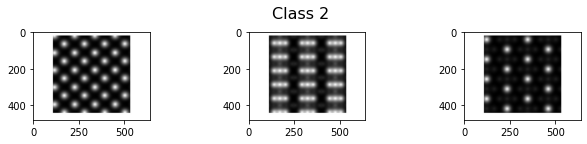

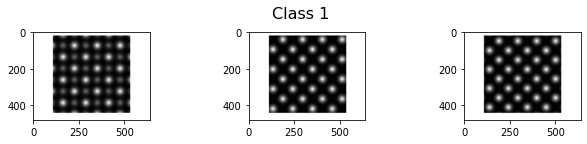

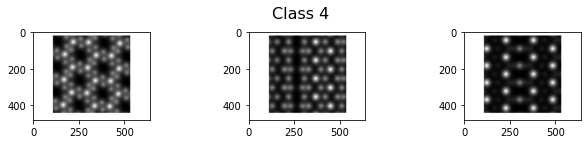

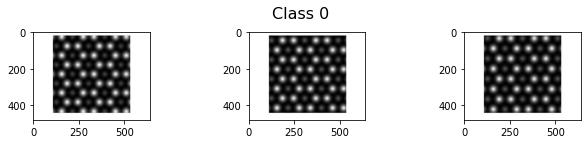

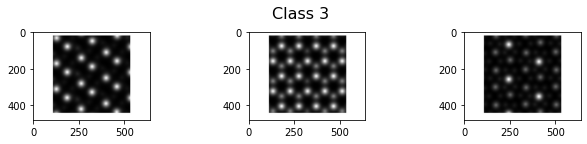

In [28]:
for cls in os.listdir(test_folder):
  fig, ax = plt.subplots(1,3, figsize = (9,2))
  fig.tight_layout(w_pad = 2)
  fig.subplots_adjust(top=0.8)
  fig.suptitle('Class {}'.format(cls), fontsize=16)
  i = 1
  for img in os.listdir(test_folder + cls)[:3]:
    plt.subplot(1,3,i)
    plt.imshow(plt.imread(test_folder + cls + "/" + img))
    i = i+1